In [1]:
from holodecml.data import load_unet_datasets_xy
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors


/glade/u/home/ggantos/miniconda3/envs/micro/lib/python3.6/site-packages/distributed/config.py:63: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config.update(yaml.load(text))


In [2]:
path_data = "/glade/p/cisl/aiml/ai4ess_hackathon/holodec/"
num_particles = "12-25"
output_cols = ["x", "y", "z", "d", "hid"]
bin_factor = 10
subset = False
input_col="image"
gauss = True


In [3]:
train_inputs,\
train_outputs,\
valid_inputs,\
valid_outputs = load_unet_datasets_xy(path_data,
                                      num_particles,
                                      output_cols,
                                      subset,
                                      bin_factor,
                                      input_col,
                                      gauss)


In [4]:
path_pred = "/glade/p/cisl/aiml/ggantos/holodec/unet/jnet_gauss/"
valid_outputs_pred = xr.open_dataset(path_pred + "valid_outputs_pred.nc")
valid_outputs_pred = valid_outputs_pred.to_array().values[0]


In [5]:
h = 0
image_pred = valid_outputs_pred[h, :, :, 0]
image_true = valid_outputs[h, :, :, 0]


In [6]:
# get coordinates where particles exist or are predicted
coords_true = np.where(image_true > 0)

idx = np.argwhere(np.diff(np.sort(image_pred.flatten())) > .0001)+1
pred_argsort = image_pred.flatten().argsort()
coords_pred = []
for i in pred_argsort[-idx.shape[0]:][::-1]:
    coord = np.array([c[0] for c in np.where(image_pred == image_pred.flatten()[i])])
    coords_pred.append(coord)
coords_pred = np.stack(coords_pred)


Number of true particles: 66.5390625
Sum of predicted probabilities: 78.00689
Max predicted probability: 0.9992829
Min predicted probability: 0.00021354541


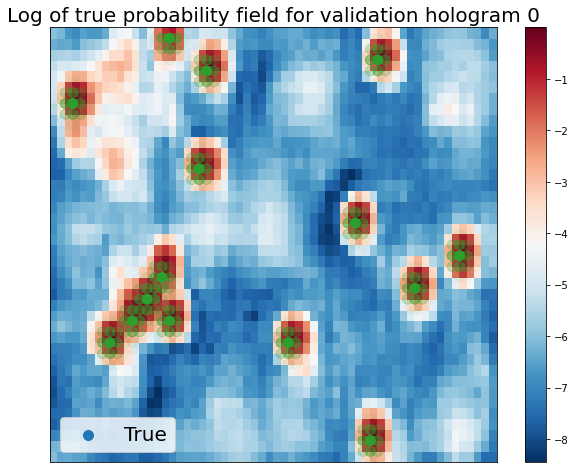

In [78]:
cmap = colors.LinearSegmentedColormap.from_list(
        'incr_alpha', [(0, (*colors.to_rgb('C2'),0)), (1, 'C2')])

fig=plt.figure(figsize=(10, 8))
plt.pcolormesh(np.log(image_pred).T, cmap="RdBu_r")
plt.colorbar()
plt.scatter(coords_true[0],
            coords_true[1],
            s=100,
            c=image_true[np.nonzero(image_true)],
            cmap=cmap,
            label="True")
print("Number of true particles:", np.sum(image_true))
print("Sum of predicted probabilities:", np.sum(image_pred))
print("Max predicted probability:", np.max(image_pred))
print("Min predicted probability:", np.min(image_pred))
plt.title(f'Log of true probability field for validation hologram {h}', fontsize=20)
plt.legend(fontsize=20)
plt.xticks([])
plt.yticks([])
plt.savefig(path_pred + "prob_field_log.png", dpi=200, bbox_inches="tight")


In [61]:
[image_pred[coords_pred[i][0], coords_pred[i][1]] for i in range(coords_pred.shape[0])]

324

In [57]:
coords_pred.shape

(324, 2)

In [47]:
image_pred.shape

(60, 40)

In [43]:
coords_pred[:, 0].shape

(324,)

/glade/u/home/ggantos/miniconda3/envs/micro/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  if sys.path[0] == '':


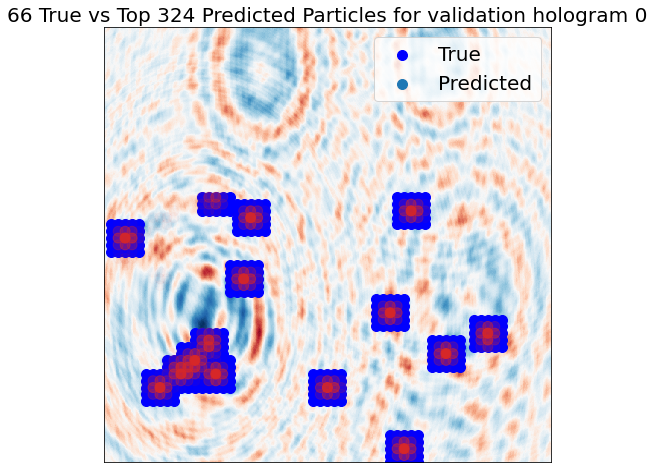

In [80]:
cmap_true = colors.LinearSegmentedColormap.from_list(
    'incr_alpha', [(0, (*colors.to_rgb('C0'),0)), (1, 'C0')])
cmap_pred = colors.LinearSegmentedColormap.from_list(
    'incr_alpha', [(0, (*colors.to_rgb('C3'),0)), (1, 'C3')])
alphas_pred = [image_pred[coords_pred[i][0], coords_pred[i][1]] for i in range(coords_pred.shape[0])]

plt.figure(figsize=(8, 8))
x_vals = np.linspace(0, 64, valid_inputs[h, :, :].shape[0])
y_vals = np.linspace(0, 64, valid_inputs[h, :, :].shape[1])
plt.xticks([])
plt.yticks([])
plt.pcolormesh(x_vals, y_vals, valid_inputs[h, :, :].T, cmap="RdBu_r")
plt.scatter(coords_true[0], coords_true[1], c='blue', s=100, label="True", zorder=2)
# plt.scatter(coords_true[0], coords_true[1], c=image_true[np.nonzero(image_true)], cmap=cmap_true, s=100, label="True", zorder=2)
# plt.scatter(coords_pred[:, 0], coords_pred[:, 1], c='red', s=100, label="Predicted", zorder=1)
plt.scatter(coords_pred[:, 0], coords_pred[:, 1], c=alphas_pred, cmap=cmap_pred, s=100, label="Predicted", zorder=2)
plt.legend(fontsize=20)
plt.title(f'{int(np.sum(image_true))} True vs Top {idx.shape[0]} Predicted Particles for validation hologram {h}', fontsize=20)
plt.savefig(path_pred + "true_vs_pred.png", dpi=200, bbox_inches="tight")


/glade/u/home/ggantos/miniconda3/envs/micro/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  if sys.path[0] == '':


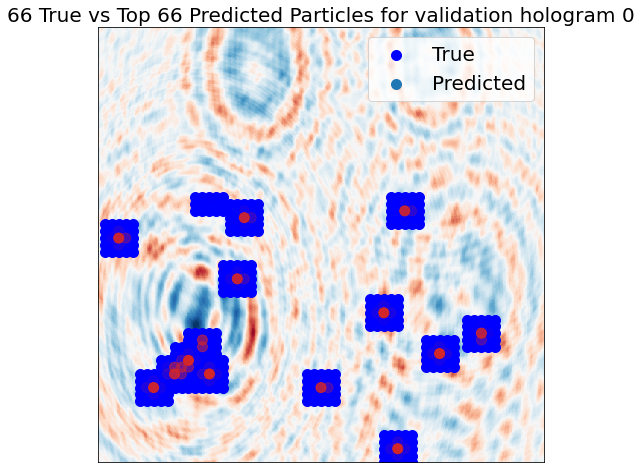

In [81]:
cmap_true = colors.LinearSegmentedColormap.from_list(
    'incr_alpha', [(0, (*colors.to_rgb('C0'),0)), (1, 'C0')])
cmap_pred = colors.LinearSegmentedColormap.from_list(
    'incr_alpha', [(0, (*colors.to_rgb('C3'),0)), (1, 'C3')])
alphas_pred = [image_pred[coords_pred[i][0], coords_pred[i][1]] for i in range(coords_pred.shape[0])]

plt.figure(figsize=(8, 8))
x_vals = np.linspace(0, 64, valid_inputs[h, :, :].shape[0])
y_vals = np.linspace(0, 64, valid_inputs[h, :, :].shape[1])
plt.xticks([])
plt.yticks([])
plt.pcolormesh(x_vals, y_vals, valid_inputs[h, :, :].T, cmap="RdBu_r")
plt.scatter(coords_true[0], coords_true[1], c='blue', s=100, label="True", zorder=2)
# plt.scatter(coords_true[0], coords_true[1], c=image_true[np.nonzero(image_true)], cmap=cmap_true, s=100, label="True", zorder=2)
# plt.scatter(coords_pred[:, 0], coords_pred[:, 1], c='red', s=100, label="Predicted", zorder=1)
plt.scatter(coords_pred[:num_true, 0], coords_pred[:num_true, 1], c=alphas_pred[:num_true], cmap=cmap_pred, s=100, label="Predicted", zorder=2)
plt.legend(fontsize=20)
plt.title(f'{num_true} True vs Top {num_true} Predicted Particles for validation hologram {h}', fontsize=20)
plt.savefig(path_pred + f"true_vs_pred_top{num_true}.png", dpi=200, bbox_inches="tight")


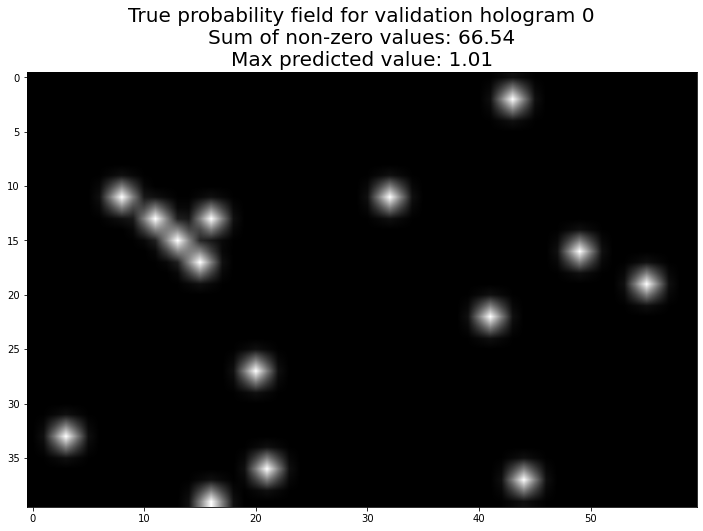

In [82]:
fig=plt.figure(figsize=(12, 8))
plt.imshow(valid_outputs[h, :, :, 0].T, interpolation='bilinear', cmap=plt.cm.gray, aspect='auto', vmin=0, vmax=1)
plt.title(f'True probability field for validation hologram {h}\nSum of non-zero values: {np.sum(valid_outputs[h, :, :, 0]):.2f}\nMax predicted value: {np.max(valid_outputs[h, :, :, 0]):.2f}', fontsize=20)
plt.savefig(path_pred + "prob_true.png", dpi=200, bbox_inches="tight")


/glade/u/home/ggantos/miniconda3/envs/micro/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


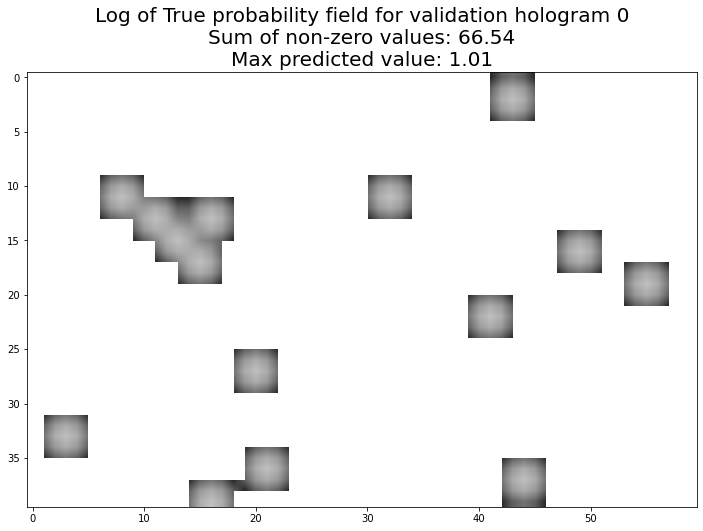

In [83]:
fig=plt.figure(figsize=(12, 8))
plt.imshow(np.log10(valid_outputs[h, :, :, 0].T), interpolation='bilinear', cmap=plt.cm.gray, aspect='auto', vmin=-3, vmax=1)
plt.title(f'Log of True probability field for validation hologram {h}\nSum of non-zero values: {np.sum(valid_outputs[h, :, :, 0]):.2f}\nMax predicted value: {np.max(valid_outputs[h, :, :, 0]):.2f}', fontsize=20)
plt.savefig(path_pred + "prob_true_log.png", dpi=200, bbox_inches="tight")


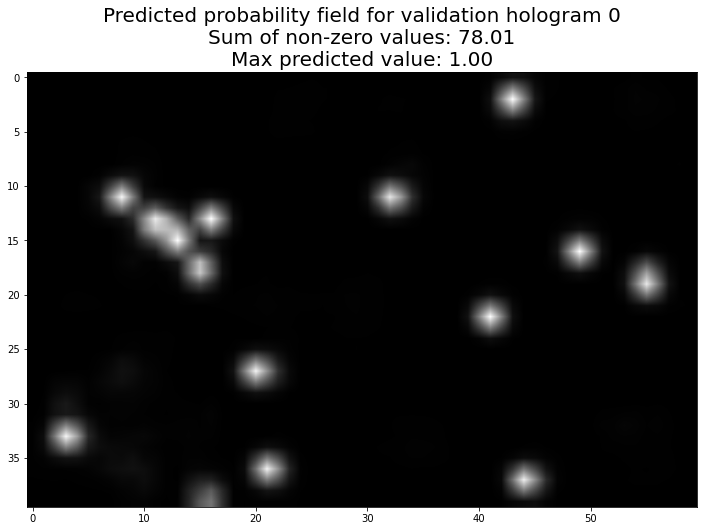

In [84]:
fig=plt.figure(figsize=(12, 8))
plt.imshow(valid_outputs_pred[h, :, :, 0].T, interpolation='bilinear', cmap=plt.cm.gray, aspect='auto', vmin=0, vmax=1)
plt.title(f'Predicted probability field for validation hologram {h}\nSum of non-zero values: {np.sum(valid_outputs_pred[h, :, :, 0]):.2f}\nMax predicted value: {np.max(valid_outputs_pred[h, :, :, 0]):.2f}', fontsize=20)
plt.savefig(path_pred + "prob_pred.png", dpi=200, bbox_inches="tight")


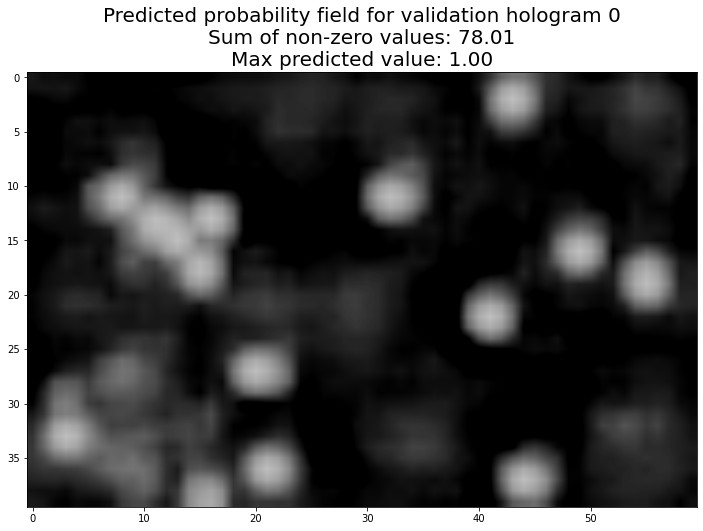

In [85]:
fig=plt.figure(figsize=(12, 8))
plt.imshow(np.log10(valid_outputs_pred[h, :, :, 0].T), interpolation='bilinear', cmap=plt.cm.gray, aspect='auto', vmin=-3., vmax=1)
plt.title(f'Predicted probability field for validation hologram {h}\nSum of non-zero values: {np.sum(valid_outputs_pred[h, :, :, 0]):.2f}\nMax predicted value: {np.max(valid_outputs_pred[h, :, :, 0]):.2f}', fontsize=20)
plt.savefig(path_pred + "prob_pred_log.png", dpi=200, bbox_inches="tight")
